ID      Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  Spending_Score  Family_Size  Var_1
458989  Female  Yes           36   Yes        Engineer    0.0              Low             1.0          Cat_6    1
464990  Male    Yes           73   No         Executive   0.0              High            2.0          Cat_6    1
465040  Male    Yes           69   No         Lawyer      1.0              Average         2.0          Cat_6    1
465039  Female  Yes           87   No         Lawyer      0.0              High            2.0          Cat_6    1
465038  Male    Yes           49   No         Executive   0.0              High            4.0          Cat_6    1
                                                                                                                ..
462007  Female  Yes           42   Yes        Artist      1.0              Average         2.0          Cat_6    1
461999  Male    No            27   Yes        Doctor      0.0              Low       

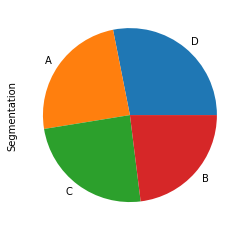

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,normalize
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler,StandardScaler

testFilepath=r"C:\Users\s-mkandemir\Anaconda3\seg_test.csv"
trainFilepath=r"C:\Users\s-mkandemir\Anaconda3\seg_train.csv"
testData=pd.read_csv(testFilepath)
trainData=pd.read_csv(trainFilepath)
trainData.drop(['ID'], axis=1)
trainData['Segmentation'].value_counts()
trainData['Segmentation'].value_counts().plot.pie()
testData.value_counts()



In [2]:

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)
trainData['Profession'].fillna(trainData['Profession'].mode()[0], inplace=True)


trainData.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
trainData.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [4]:
trainData['Profession'].isnull().sum()

0

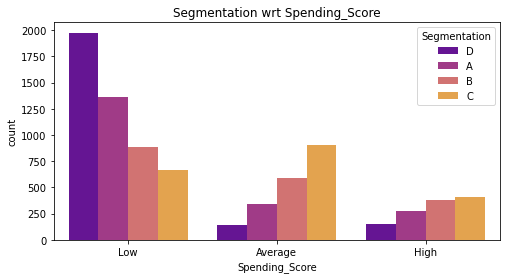

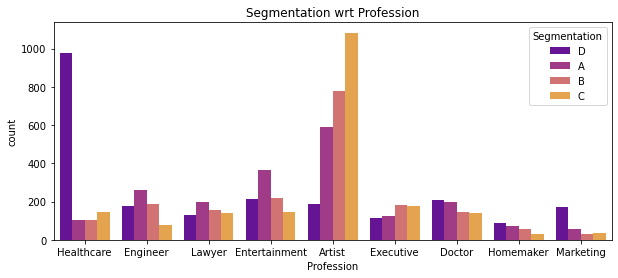

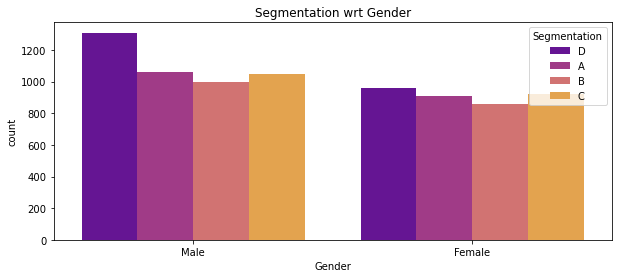

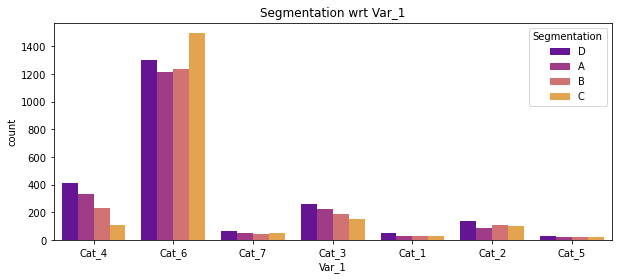

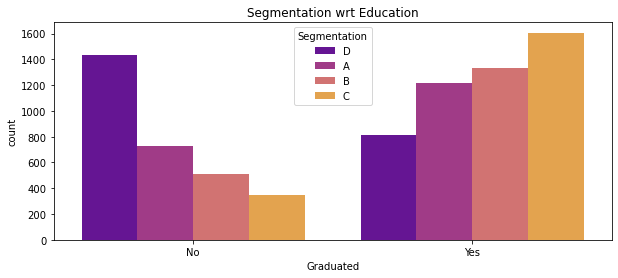

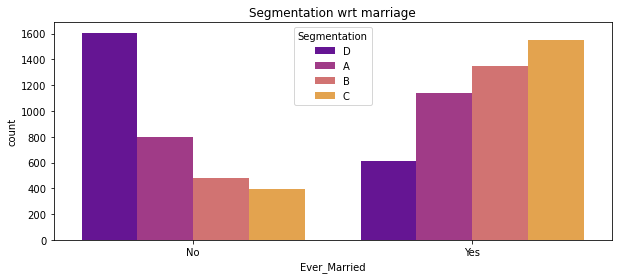

In [5]:
plt.figure(figsize=(8,4))
sn.countplot(x='Spending_Score',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt Spending_Score")
plt.show()
plt.figure(figsize=(10,4))
sn.countplot(x='Profession',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt Profession")
plt.show()
plt.figure(figsize=(10,4))
sn.countplot(x='Gender',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt Gender")
plt.show()
plt.figure(figsize=(10,4))
sn.countplot(x='Var_1',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt Var_1")
plt.show()
plt.figure(figsize=(10,4))
sn.countplot(x='Graduated',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt Education")
plt.show()
plt.figure(figsize=(10,4))
sn.countplot(x='Ever_Married',hue='Segmentation', data=trainData, palette='plasma')
plt.title("Segmentation wrt marriage")
plt.show()

In [6]:
trainData=trainData.drop(['Segmentation'],axis=1)
trainData=trainData.drop(['Var_1'],axis=1)

In [7]:
trainData.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [8]:
trainData['Family_Size'].fillna(int(trainData['Family_Size'].mean()),inplace=True)
trainData['Work_Experience'].fillna(int(trainData['Work_Experience'].mean()),inplace=True)


In [9]:
trainData=encode_and_bind(trainData,'Spending_Score')
trainData=encode_and_bind(trainData,'Profession')
trainData=encode_and_bind(trainData,'Gender')
trainData=encode_and_bind(trainData,'Graduated')
trainData=encode_and_bind(trainData,'Ever_Married')
trainData=trainData.drop(['Gender','Ever_Married','Profession','Graduated','Spending_Score','ID'],axis=1)
trainData.head()


,Age,Work_Experience,Family_Size,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Gender_Female,Gender_Male,Graduated_No,Graduated_Yes,Ever_Married_No,Ever_Married_Yes
0,22,1.0,4.0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
1,38,2.0,3.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
2,67,1.0,1.0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,67,0.0,2.0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
4,40,2.0,6.0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [10]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(trainData)
    kmeanModel.fit(trainData)
 
    distortions.append(sum(np.min(cdist(trainData, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / trainData.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(trainData, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / trainData.shape[0]
    mapping2[k] = kmeanModel.inertia_

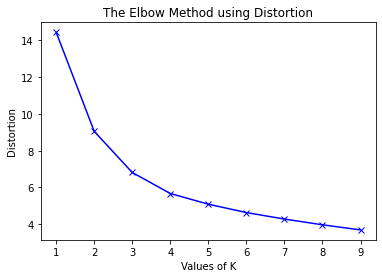

In [11]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

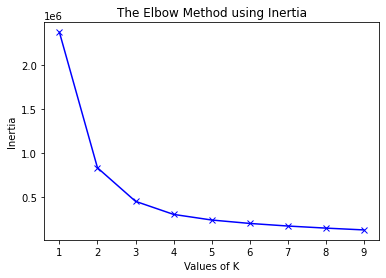

In [12]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

C:\Users\s-mkandemir\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

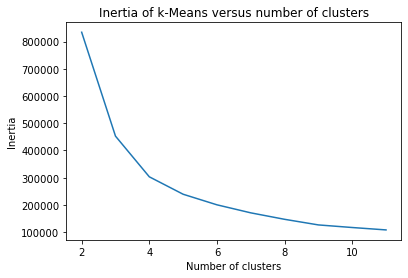

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
scores = [KMeans(n_clusters=i+2).fit(trainData).inertia_ 
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

kmeans: 0.040115051804262836


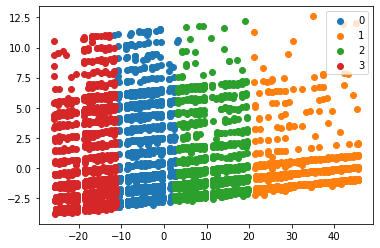

In [14]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
#sc = StandardScaler()
#dfsc=sc.fit_transform(trainData)
 #Prepare models
pca=PCA(2)
df=pca.fit_transform(trainData)
kmeans = KMeans(n_clusters= 4).fit(trainData)
normalized_vectors = normalize(trainData)
normalized_kmeans = KMeans(n_clusters=4).fit(normalized_vectors)
label=kmeans.fit_predict(df)

# Print results
print('kmeans: {}'.format(silhouette_score(trainData,normalized_kmeans.labels_, 
                                           metric='euclidean')))
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [18]:

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_validate

segment0=trainData.iloc[label==0]
segment1=trainData.iloc[label==1]
segment2=trainData.iloc[label==2]
segment3=trainData.iloc[label==3]
segments=segment0+segment1+segment2+segment3
print(segment0)

      Age  Work_Experience  Family_Size  Spending_Score_Average  \
1      38              2.0          3.0                       1   
4      40              2.0          6.0                       0   
7      33              1.0          3.0                       0   
15     41              1.0          2.0                       0   
22     33             13.0          2.0                       0   
...   ...              ...          ...                     ...   
8059   39              3.0          2.0                       0   
8062   41              0.0          5.0                       0   
8064   35              3.0          4.0                       0   
8065   33              1.0          1.0                       0   
8067   37              0.0          3.0                       1   

      Spending_Score_High  Spending_Score_Low  Profession_Artist  \
1                       0                   0                  0   
4                       1                   0              

In [19]:
X_train, X_test, y_train, y_test = train_test_split(segment0, trainData, test_size = 0.5, random_state = 42)

clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
cm=(confusion_matrix(y_test, pred))
print(cm)
print(classification_report(y_test, pred))

ValueError: Found input variables with inconsistent numbers of samples: [2469, 8068]

In [ ]:
trainData.iloc[label==1].describe()

In [ ]:
trainData.iloc[label==2].describe()

In [ ]:
trainData.iloc[label==0].describe()

In [ ]:
trainData.iloc[label==3].describe()